In [33]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten, Dropout, Concatenate
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import keras.optimizers as keras
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import balanced_accuracy_score
import cv2
from imblearn.over_sampling import RandomOverSampler, SMOTE
import tensorflow as tf
from keras import backend as K
from keras.callbacks import LearningRateScheduler
import utils
from keras.regularizers import L2

Dados

In [34]:
data = utils.load_oct_data()
X_train, Y_train = data["train"]
X_val, Y_val = data["dev"]
X_test, Y_test = data["test"]
Y_train = to_categorical(Y_train,4)
Y_val = to_categorical(Y_val,4)
#X_train = X_train.reshape(-1,1)
Y_val.shape

(10832, 4)

QUESTÃO 1

In [35]:
otimizer = keras.SGD(learning_rate=0.001)
Modelo1 = Sequential()
Modelo1.add(Dense(16, input_dim=784, activation='relu'))
Modelo1.add(Dense(4,activation='softmax'))
Modelo1.compile(loss='categorical_crossentropy', optimizer=otimizer,metrics=['accuracy'])
Modelo1.summary()
Resultado = Modelo1.fit(x=X_train, y=Y_train, epochs=20, validation_data=(X_val, Y_val), batch_size=16)
K.clear_session()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 4)                 68        
                                                                 
Total params: 12,628
Trainable params: 12,628
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
6093/6093 [==============================] - 11s 2ms/step - loss: 1.1552 - accuracy: 0.4900 - val_loss: 1.1320 - val_accuracy: 0.5079
Epoch 2/20
6093/6093 [==============================] - 10s 2ms/step - loss: 1.1222 - accuracy: 0.5192 - val_loss: 1.1111 - val_accuracy: 0.5287
Epoch 3/20
6093/6093 [==============================] - 10s 2ms/step - loss: 1.1007 - accuracy: 0.5445 - val_loss: 1.0901 - val_accuracy: 0.5497
Epoch 4/20
60

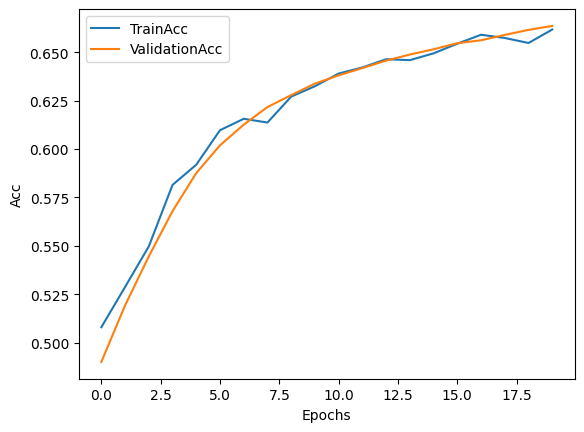

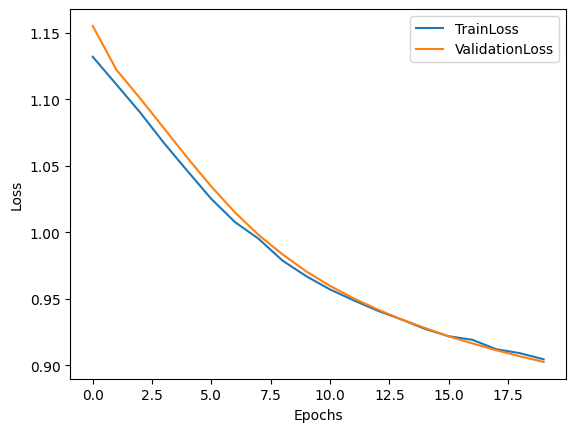

In [36]:
plotValLoss = Resultado.history['val_accuracy']
plotLoss = Resultado.history['accuracy']
plt.plot(plotValLoss)
plt.plot(plotLoss)
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['TrainAcc', 'ValidationAcc'])
plt.show()
plotValLoss = Resultado.history['val_loss']
plotLoss = Resultado.history['loss']
plt.plot(plotValLoss)
plt.plot(plotLoss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['TrainLoss', 'ValidationLoss'])
plt.show()


In [37]:

Modelo1 = Sequential()
Modelo1.add(Dense(16, input_shape=(784,), activation='relu'))
Modelo1.add(Dense(4,activation='softmax'))
Modelo1.compile(optimizer=keras.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
Resultado = Modelo1.fit(x=X_train, y=Y_train, epochs=20, validation_data=(X_val, Y_val), verbose=2, batch_size=16)
K.clear_session()

Epoch 1/20
6093/6093 - 10s - loss: 1.0672 - accuracy: 0.5675 - val_loss: 0.9826 - val_accuracy: 0.6177 - 10s/epoch - 2ms/step
Epoch 2/20
6093/6093 - 9s - loss: 0.9445 - accuracy: 0.6390 - val_loss: 0.9033 - val_accuracy: 0.6628 - 9s/epoch - 1ms/step
Epoch 3/20
6093/6093 - 9s - loss: 0.8933 - accuracy: 0.6632 - val_loss: 0.8800 - val_accuracy: 0.6675 - 9s/epoch - 2ms/step
Epoch 4/20
6093/6093 - 9s - loss: 0.8563 - accuracy: 0.6802 - val_loss: 0.8314 - val_accuracy: 0.6868 - 9s/epoch - 2ms/step
Epoch 5/20
6093/6093 - 9s - loss: 0.8243 - accuracy: 0.6943 - val_loss: 0.8206 - val_accuracy: 0.6945 - 9s/epoch - 1ms/step
Epoch 6/20
6093/6093 - 9s - loss: 0.8014 - accuracy: 0.7049 - val_loss: 0.7884 - val_accuracy: 0.7097 - 9s/epoch - 2ms/step
Epoch 7/20
6093/6093 - 10s - loss: 0.7839 - accuracy: 0.7128 - val_loss: 0.7645 - val_accuracy: 0.7225 - 10s/epoch - 2ms/step
Epoch 8/20
6093/6093 - 9s - loss: 0.7703 - accuracy: 0.7177 - val_loss: 0.8066 - val_accuracy: 0.6978 - 9s/epoch - 2ms/step
Epoc

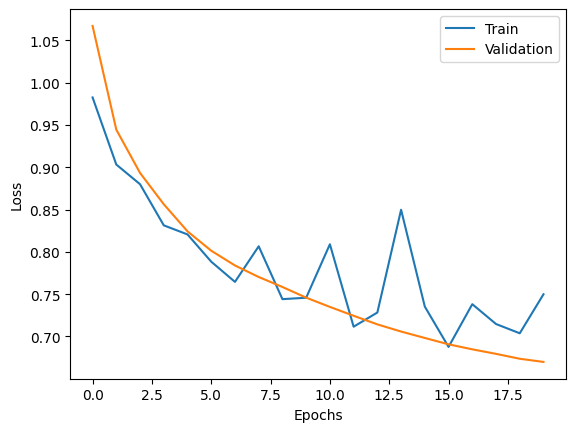

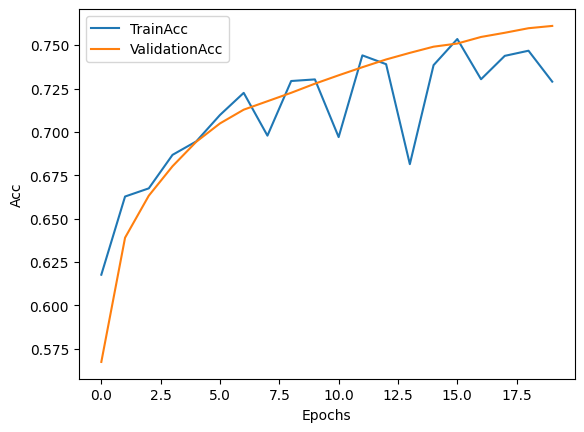

In [38]:
plotValLoss = Resultado.history['val_loss']
plotLoss = Resultado.history['loss']
plt.plot(plotValLoss)
plt.plot(plotLoss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()
plotValLoss = Resultado.history['val_accuracy']
plotLoss = Resultado.history['accuracy']
plt.plot(plotValLoss)
plt.plot(plotLoss)
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['TrainAcc', 'ValidationAcc'])
plt.show()

In [39]:
Modelo1 = Sequential()
Modelo1.add(Dense(16, input_shape=(784,), activation='relu'))
Modelo1.add(Dense(4,activation='softmax'))
Modelo1.compile(optimizer=keras.SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
Resultado = Modelo1.fit(x=X_train, y=Y_train, epochs=20, validation_data=(X_val, Y_val), verbose=2, batch_size=16)
K.clear_session()


Epoch 1/20
6093/6093 - 9s - loss: 0.9883 - accuracy: 0.6077 - val_loss: 0.9429 - val_accuracy: 0.6454 - 9s/epoch - 1ms/step
Epoch 2/20
6093/6093 - 8s - loss: 0.8740 - accuracy: 0.6693 - val_loss: 0.9992 - val_accuracy: 0.6113 - 8s/epoch - 1ms/step
Epoch 3/20
6093/6093 - 8s - loss: 0.8300 - accuracy: 0.6890 - val_loss: 0.8551 - val_accuracy: 0.6779 - 8s/epoch - 1ms/step
Epoch 4/20
6093/6093 - 8s - loss: 0.8074 - accuracy: 0.6998 - val_loss: 0.8073 - val_accuracy: 0.7007 - 8s/epoch - 1ms/step
Epoch 5/20
6093/6093 - 8s - loss: 0.7899 - accuracy: 0.7091 - val_loss: 0.7702 - val_accuracy: 0.7121 - 8s/epoch - 1ms/step
Epoch 6/20
6093/6093 - 8s - loss: 0.7747 - accuracy: 0.7144 - val_loss: 0.7882 - val_accuracy: 0.7101 - 8s/epoch - 1ms/step
Epoch 7/20
6093/6093 - 8s - loss: 0.7580 - accuracy: 0.7223 - val_loss: 0.7579 - val_accuracy: 0.7233 - 8s/epoch - 1ms/step
Epoch 8/20
6093/6093 - 9s - loss: 0.7443 - accuracy: 0.7283 - val_loss: 0.7388 - val_accuracy: 0.7290 - 9s/epoch - 1ms/step
Epoch 9/

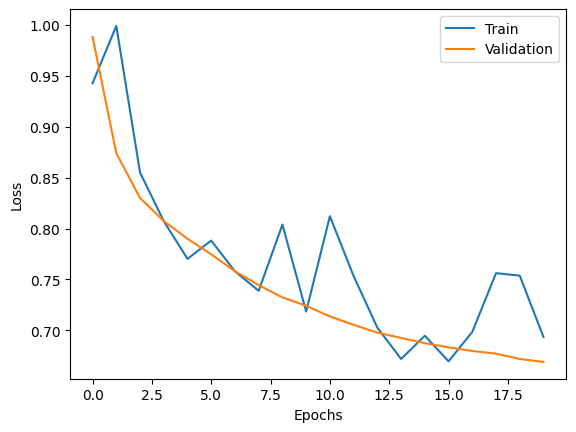

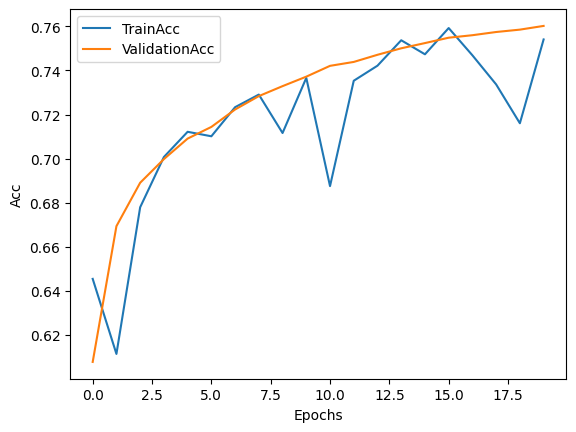

In [40]:
plotValLoss = Resultado.history['val_loss']
plotLoss = Resultado.history['loss']
plt.plot(plotValLoss)
plt.plot(plotLoss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()
plotValLoss = Resultado.history['val_accuracy']
plotLoss = Resultado.history['accuracy']
plt.plot(plotValLoss)
plt.plot(plotLoss)
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['TrainAcc', 'ValidationAcc'])
plt.show()

Questão 2 A)

In [41]:
Modelo1 = Sequential()
Modelo1.add(Dense(200, input_shape=(784,), activation='relu'))
Modelo1.add(Dropout(0.0))
Modelo1.add(Dense(4,activation='softmax'))
Modelo1.compile(optimizer=keras.SGD(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
Resultado = Modelo1.fit(x=X_train, y=Y_train, epochs=20, validation_data=(X_val, Y_val), verbose=2, batch_size=16)
K.clear_session()

Epoch 1/20
6093/6093 - 15s - loss: 0.9409 - accuracy: 0.6320 - val_loss: 0.8394 - val_accuracy: 0.6875 - 15s/epoch - 2ms/step
Epoch 2/20
6093/6093 - 12s - loss: 0.7736 - accuracy: 0.7147 - val_loss: 0.7493 - val_accuracy: 0.7237 - 12s/epoch - 2ms/step
Epoch 3/20
6093/6093 - 13s - loss: 0.7082 - accuracy: 0.7412 - val_loss: 0.7288 - val_accuracy: 0.7287 - 13s/epoch - 2ms/step
Epoch 4/20
6093/6093 - 13s - loss: 0.6675 - accuracy: 0.7585 - val_loss: 0.6402 - val_accuracy: 0.7710 - 13s/epoch - 2ms/step
Epoch 5/20
6093/6093 - 14s - loss: 0.6387 - accuracy: 0.7702 - val_loss: 0.6239 - val_accuracy: 0.7753 - 14s/epoch - 2ms/step
Epoch 6/20
6093/6093 - 13s - loss: 0.6181 - accuracy: 0.7780 - val_loss: 0.8640 - val_accuracy: 0.7037 - 13s/epoch - 2ms/step
Epoch 7/20
6093/6093 - 12s - loss: 0.5997 - accuracy: 0.7850 - val_loss: 0.6505 - val_accuracy: 0.7719 - 12s/epoch - 2ms/step
Epoch 8/20
6093/6093 - 13s - loss: 0.5849 - accuracy: 0.7902 - val_loss: 0.6492 - val_accuracy: 0.7771 - 13s/epoch - 2

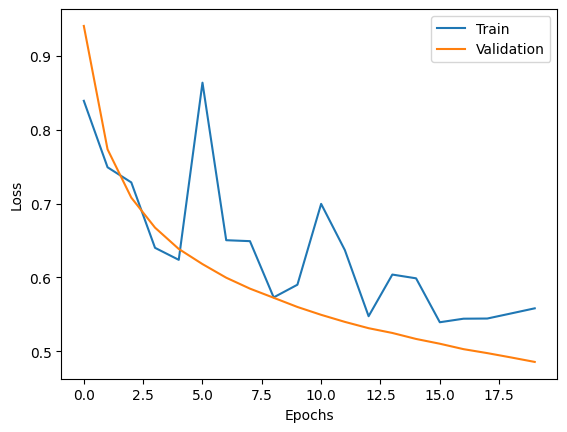

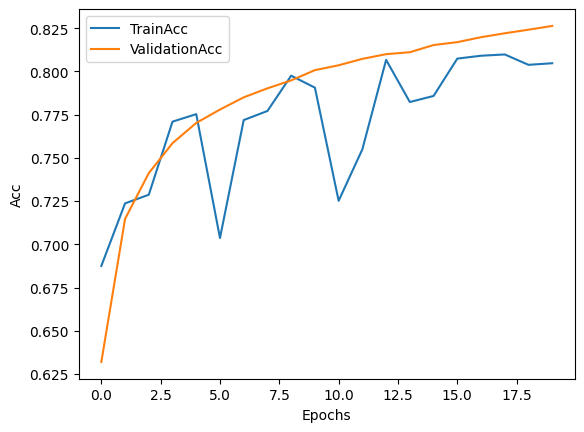

In [42]:
plotValLoss = Resultado.history['val_loss']
plotLoss = Resultado.history['loss']
plt.plot(plotValLoss)
plt.plot(plotLoss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()
plotValLoss = Resultado.history['val_accuracy']
plotLoss = Resultado.history['accuracy']
plt.plot(plotValLoss)
plt.plot(plotLoss)
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['TrainAcc', 'ValidationAcc'])
plt.show()

In [43]:
Modelo1 = Sequential()
Modelo1.add(Dense(200, input_shape=(784,), activation='relu'))
Modelo1.add(Dropout(0.0))
Modelo1.add(Dense(4,activation='softmax'))
Modelo1.compile(optimizer=keras.SGD(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
Resultado = Modelo1.fit(x=X_train, y=Y_train, epochs=20, validation_data=(X_val, Y_val), verbose=2, batch_size=1024)
K.clear_session()

Epoch 1/20
96/96 - 1s - loss: 1.1350 - accuracy: 0.5117 - val_loss: 1.1137 - val_accuracy: 0.5103 - 1s/epoch - 14ms/step
Epoch 2/20
96/96 - 1s - loss: 1.0918 - accuracy: 0.5541 - val_loss: 1.0759 - val_accuracy: 0.5930 - 760ms/epoch - 8ms/step
Epoch 3/20
96/96 - 1s - loss: 1.0646 - accuracy: 0.5710 - val_loss: 1.0800 - val_accuracy: 0.5372 - 781ms/epoch - 8ms/step
Epoch 4/20
96/96 - 1s - loss: 1.0377 - accuracy: 0.5867 - val_loss: 1.0013 - val_accuracy: 0.6145 - 864ms/epoch - 9ms/step
Epoch 5/20
96/96 - 1s - loss: 1.0122 - accuracy: 0.5993 - val_loss: 1.0080 - val_accuracy: 0.6078 - 1s/epoch - 12ms/step
Epoch 6/20
96/96 - 1s - loss: 0.9926 - accuracy: 0.6095 - val_loss: 1.0133 - val_accuracy: 0.5971 - 739ms/epoch - 8ms/step
Epoch 7/20
96/96 - 1s - loss: 0.9822 - accuracy: 0.6126 - val_loss: 0.9632 - val_accuracy: 0.6148 - 720ms/epoch - 8ms/step
Epoch 8/20
96/96 - 1s - loss: 0.9649 - accuracy: 0.6216 - val_loss: 0.9656 - val_accuracy: 0.6267 - 737ms/epoch - 8ms/step
Epoch 9/20
96/96 - 1

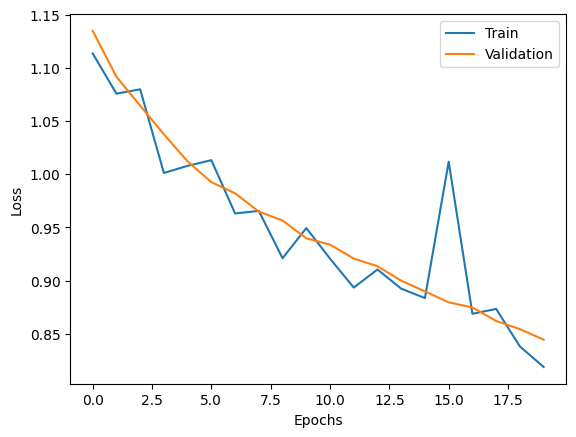

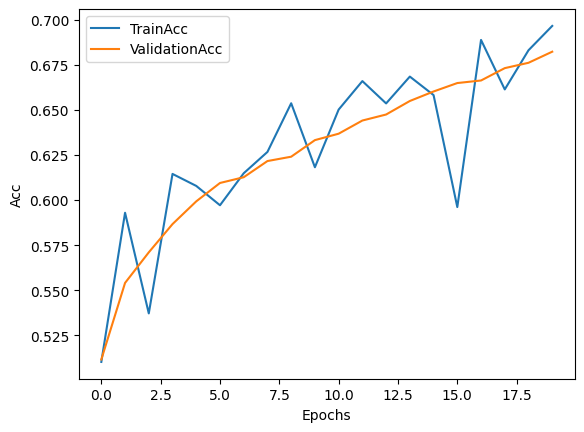

In [44]:
plotValLoss = Resultado.history['val_loss']
plotLoss = Resultado.history['loss']
plt.plot(plotValLoss)
plt.plot(plotLoss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()
plotValLoss = Resultado.history['val_accuracy']
plotLoss = Resultado.history['accuracy']
plt.plot(plotValLoss)
plt.plot(plotLoss)
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['TrainAcc', 'ValidationAcc'])
plt.show()

Questão 2 B)

In [45]:
Modelo1 = Sequential()
Modelo1.add(Dense(200, input_shape=(784,), activation='relu'))
Modelo1.add(Dropout(0.0))
Modelo1.add(Dense(4,activation='softmax'))
Modelo1.compile(optimizer=keras.SGD(lr=1), loss='categorical_crossentropy', metrics=['accuracy'])
Resultado = Modelo1.fit(x=X_train, y=Y_train, epochs=20, validation_data=(X_val, Y_val), verbose=2, batch_size=16)
K.clear_session()

Epoch 1/20
6093/6093 - 13s - loss: 1.1738 - accuracy: 0.4543 - val_loss: 1.1684 - val_accuracy: 0.4721 - 13s/epoch - 2ms/step
Epoch 2/20
6093/6093 - 12s - loss: 1.1707 - accuracy: 0.4563 - val_loss: 1.1682 - val_accuracy: 0.4721 - 12s/epoch - 2ms/step
Epoch 3/20
6093/6093 - 12s - loss: 1.1710 - accuracy: 0.4567 - val_loss: 1.1829 - val_accuracy: 0.4721 - 12s/epoch - 2ms/step
Epoch 4/20
6093/6093 - 13s - loss: 1.1709 - accuracy: 0.4553 - val_loss: 1.1683 - val_accuracy: 0.4721 - 13s/epoch - 2ms/step
Epoch 5/20
6093/6093 - 12s - loss: 1.1714 - accuracy: 0.4539 - val_loss: 1.1606 - val_accuracy: 0.4721 - 12s/epoch - 2ms/step
Epoch 6/20
6093/6093 - 13s - loss: 1.1706 - accuracy: 0.4573 - val_loss: 1.2011 - val_accuracy: 0.3435 - 13s/epoch - 2ms/step
Epoch 7/20
6093/6093 - 12s - loss: 1.1710 - accuracy: 0.4559 - val_loss: 1.1728 - val_accuracy: 0.4721 - 12s/epoch - 2ms/step
Epoch 8/20
6093/6093 - 13s - loss: 1.1706 - accuracy: 0.4565 - val_loss: 1.1850 - val_accuracy: 0.4721 - 13s/epoch - 2

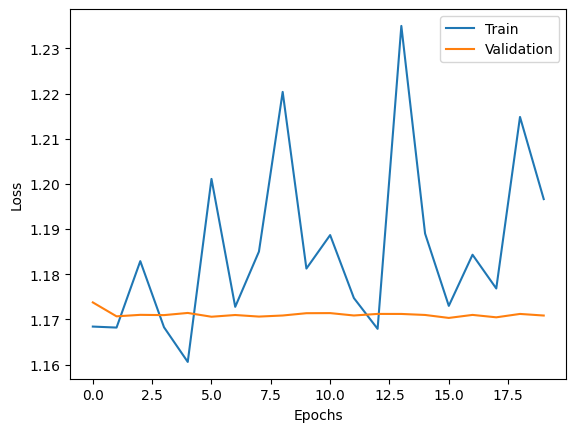

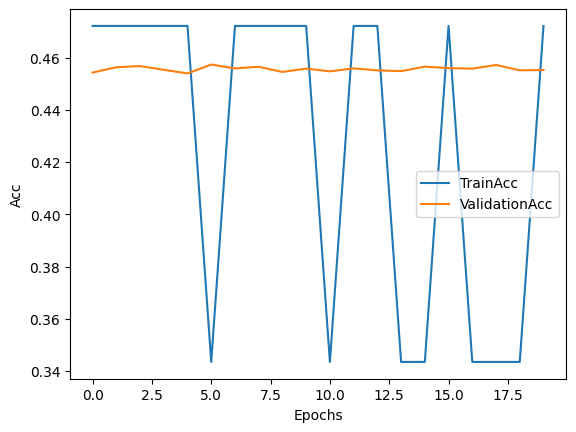

In [46]:
plotValLoss = Resultado.history['val_loss']
plotLoss = Resultado.history['loss']
plt.plot(plotValLoss)
plt.plot(plotLoss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()
plotValLoss = Resultado.history['val_accuracy']
plotLoss = Resultado.history['accuracy']
plt.plot(plotValLoss)
plt.plot(plotLoss)
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['TrainAcc', 'ValidationAcc'])
plt.show()

In [47]:
Modelo1 = Sequential()
Modelo1.add(Dense(200, input_shape=(784,), activation='relu'))
Modelo1.add(Dropout(0.0))
Modelo1.add(Dense(4,activation='softmax'))
Modelo1.compile(optimizer=keras.SGD(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
Resultado = Modelo1.fit(x=X_train, y=Y_train, epochs=20, validation_data=(X_val, Y_val), verbose=2, batch_size=16)
K.clear_session()

Epoch 1/20
6093/6093 - 13s - loss: 0.9466 - accuracy: 0.6299 - val_loss: 0.9882 - val_accuracy: 0.6387 - 13s/epoch - 2ms/step
Epoch 2/20
6093/6093 - 12s - loss: 0.7803 - accuracy: 0.7113 - val_loss: 0.8999 - val_accuracy: 0.6472 - 12s/epoch - 2ms/step
Epoch 3/20
6093/6093 - 12s - loss: 0.7114 - accuracy: 0.7420 - val_loss: 0.6815 - val_accuracy: 0.7584 - 12s/epoch - 2ms/step
Epoch 4/20
6093/6093 - 12s - loss: 0.6718 - accuracy: 0.7569 - val_loss: 0.6904 - val_accuracy: 0.7471 - 12s/epoch - 2ms/step
Epoch 5/20
6093/6093 - 12s - loss: 0.6445 - accuracy: 0.7680 - val_loss: 0.6262 - val_accuracy: 0.7758 - 12s/epoch - 2ms/step
Epoch 6/20
6093/6093 - 12s - loss: 0.6197 - accuracy: 0.7787 - val_loss: 0.6295 - val_accuracy: 0.7791 - 12s/epoch - 2ms/step
Epoch 7/20
6093/6093 - 13s - loss: 0.6021 - accuracy: 0.7849 - val_loss: 1.0484 - val_accuracy: 0.6544 - 13s/epoch - 2ms/step
Epoch 8/20
6093/6093 - 13s - loss: 0.5883 - accuracy: 0.7890 - val_loss: 0.6703 - val_accuracy: 0.7614 - 13s/epoch - 2

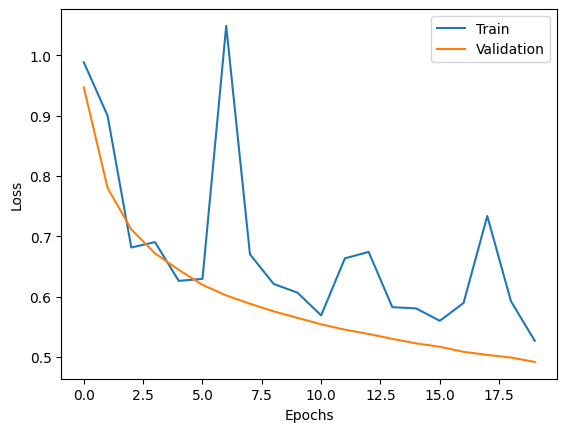

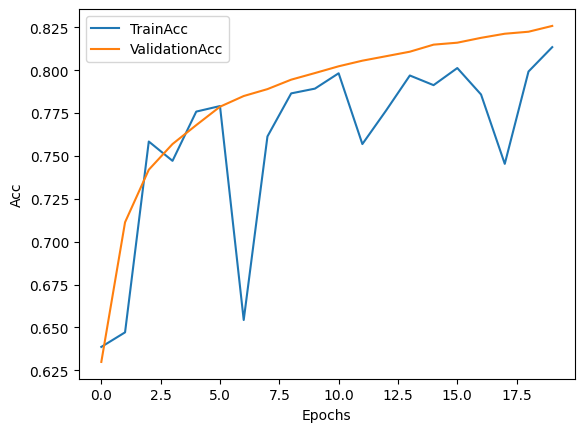

In [48]:
plotValLoss = Resultado.history['val_loss']
plotLoss = Resultado.history['loss']
plt.plot(plotValLoss)
plt.plot(plotLoss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()
plotValLoss = Resultado.history['val_accuracy']
plotLoss = Resultado.history['accuracy']
plt.plot(plotValLoss)
plt.plot(plotLoss)
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['TrainAcc', 'ValidationAcc'])
plt.show()

In [49]:
Modelo1 = Sequential()
Modelo1.add(Dense(200, input_shape=(784,), activation='relu'))
Modelo1.add(Dropout(0.0))
Modelo1.add(Dense(4,activation='softmax'))
Modelo1.compile(optimizer=keras.SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
Resultado = Modelo1.fit(x=X_train, y=Y_train, epochs=20, validation_data=(X_val, Y_val), verbose=2, batch_size=16)
K.clear_session()

Epoch 1/20
6093/6093 - 13s - loss: 1.0371 - accuracy: 0.5901 - val_loss: 0.9657 - val_accuracy: 0.6172 - 13s/epoch - 2ms/step
Epoch 2/20
6093/6093 - 12s - loss: 0.9192 - accuracy: 0.6521 - val_loss: 0.9267 - val_accuracy: 0.6372 - 12s/epoch - 2ms/step
Epoch 3/20
6093/6093 - 12s - loss: 0.8648 - accuracy: 0.6772 - val_loss: 0.8335 - val_accuracy: 0.6972 - 12s/epoch - 2ms/step
Epoch 4/20
6093/6093 - 13s - loss: 0.8134 - accuracy: 0.6999 - val_loss: 0.7974 - val_accuracy: 0.7010 - 13s/epoch - 2ms/step
Epoch 5/20
6093/6093 - 12s - loss: 0.7668 - accuracy: 0.7206 - val_loss: 0.7424 - val_accuracy: 0.7292 - 12s/epoch - 2ms/step
Epoch 6/20
6093/6093 - 12s - loss: 0.7260 - accuracy: 0.7372 - val_loss: 0.7350 - val_accuracy: 0.7351 - 12s/epoch - 2ms/step
Epoch 7/20
6093/6093 - 12s - loss: 0.6951 - accuracy: 0.7494 - val_loss: 0.7049 - val_accuracy: 0.7399 - 12s/epoch - 2ms/step
Epoch 8/20
6093/6093 - 13s - loss: 0.6693 - accuracy: 0.7600 - val_loss: 0.6500 - val_accuracy: 0.7694 - 13s/epoch - 2

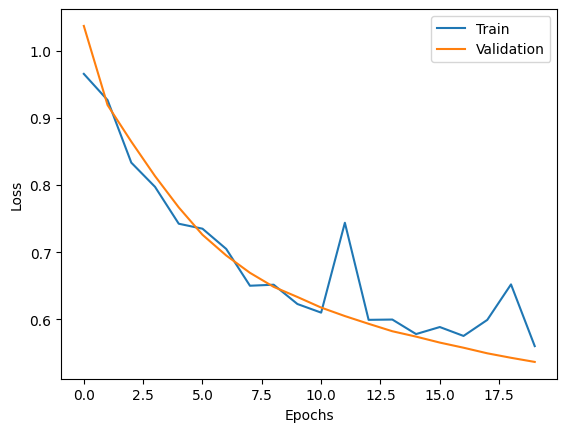

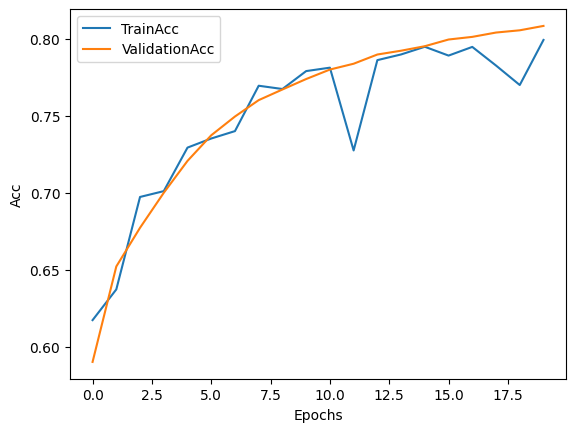

In [50]:
plotValLoss = Resultado.history['val_loss']
plotLoss = Resultado.history['loss']
plt.plot(plotValLoss)
plt.plot(plotLoss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()
plotValLoss = Resultado.history['val_accuracy']
plotLoss = Resultado.history['accuracy']
plt.plot(plotValLoss)
plt.plot(plotLoss)
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['TrainAcc', 'ValidationAcc'])
plt.show()

In [51]:
Modelo1 = Sequential()
Modelo1.add(Dense(200, input_shape=(784,), activation='relu'))
Modelo1.add(Dropout(0.0))
Modelo1.add(Dense(4,activation='softmax'))
Modelo1.compile(optimizer=keras.SGD(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
Resultado = Modelo1.fit(x=X_train, y=Y_train, epochs=20, validation_data=(X_val, Y_val), verbose=2, batch_size=16)
K.clear_session()

Epoch 1/20
6093/6093 - 12s - loss: 1.1444 - accuracy: 0.4991 - val_loss: 1.1162 - val_accuracy: 0.5303 - 12s/epoch - 2ms/step
Epoch 2/20
6093/6093 - 10s - loss: 1.1014 - accuracy: 0.5488 - val_loss: 1.0847 - val_accuracy: 0.5603 - 10s/epoch - 2ms/step
Epoch 3/20
6093/6093 - 10s - loss: 1.0700 - accuracy: 0.5803 - val_loss: 1.0546 - val_accuracy: 0.5967 - 10s/epoch - 2ms/step
Epoch 4/20
6093/6093 - 10s - loss: 1.0409 - accuracy: 0.5997 - val_loss: 1.0273 - val_accuracy: 0.6091 - 10s/epoch - 2ms/step
Epoch 5/20
6093/6093 - 10s - loss: 1.0150 - accuracy: 0.6142 - val_loss: 1.0030 - val_accuracy: 0.6187 - 10s/epoch - 2ms/step
Epoch 6/20
6093/6093 - 10s - loss: 0.9930 - accuracy: 0.6226 - val_loss: 0.9829 - val_accuracy: 0.6255 - 10s/epoch - 2ms/step
Epoch 7/20
6093/6093 - 10s - loss: 0.9748 - accuracy: 0.6312 - val_loss: 0.9664 - val_accuracy: 0.6306 - 10s/epoch - 2ms/step
Epoch 8/20
6093/6093 - 10s - loss: 0.9593 - accuracy: 0.6367 - val_loss: 0.9518 - val_accuracy: 0.6403 - 10s/epoch - 2

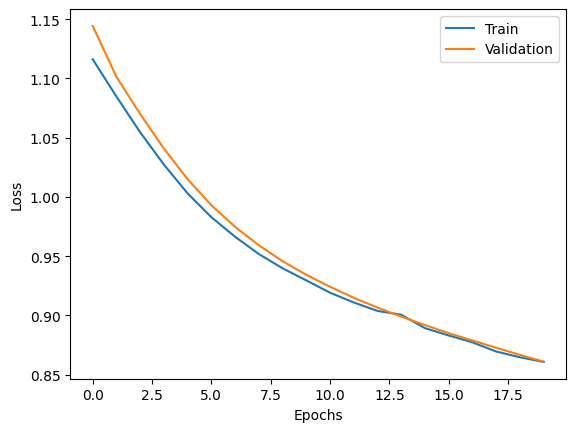

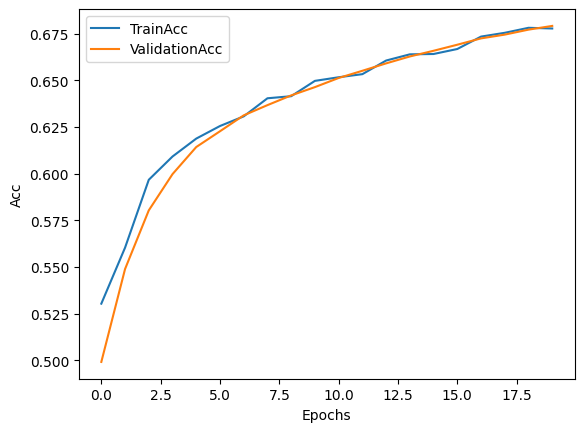

In [52]:
plotValLoss = Resultado.history['val_loss']
plotLoss = Resultado.history['loss']
plt.plot(plotValLoss)
plt.plot(plotLoss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()
plotValLoss = Resultado.history['val_accuracy']
plotLoss = Resultado.history['accuracy']
plt.plot(plotValLoss)
plt.plot(plotLoss)
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['TrainAcc', 'ValidationAcc'])
plt.show()

Q2C

In [53]:
Modelo1 = Sequential()
Modelo1.add(Dense(200, input_shape=(784,), activation='relu'))
Modelo1.add(Dropout(0.0))
Modelo1.add(Dense(4,activation='softmax'))
Modelo1.compile(optimizer=keras.SGD(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
Resultado = Modelo1.fit(x=X_train, y=Y_train, epochs=150, validation_data=(X_val, Y_val), verbose=2, batch_size=256)
K.clear_session()

Epoch 1/150
381/381 - 3s - loss: 1.0880 - accuracy: 0.5508 - val_loss: 1.0719 - val_accuracy: 0.5569 - 3s/epoch - 9ms/step
Epoch 2/150
381/381 - 2s - loss: 0.9953 - accuracy: 0.6070 - val_loss: 0.9894 - val_accuracy: 0.5944 - 2s/epoch - 5ms/step
Epoch 3/150
381/381 - 2s - loss: 0.9440 - accuracy: 0.6338 - val_loss: 0.8953 - val_accuracy: 0.6612 - 2s/epoch - 5ms/step
Epoch 4/150
381/381 - 2s - loss: 0.9098 - accuracy: 0.6505 - val_loss: 0.8730 - val_accuracy: 0.6776 - 2s/epoch - 6ms/step
Epoch 5/150
381/381 - 2s - loss: 0.8758 - accuracy: 0.6665 - val_loss: 0.8556 - val_accuracy: 0.6787 - 2s/epoch - 5ms/step
Epoch 6/150
381/381 - 2s - loss: 0.8418 - accuracy: 0.6830 - val_loss: 0.8875 - val_accuracy: 0.6521 - 2s/epoch - 5ms/step
Epoch 7/150
381/381 - 2s - loss: 0.8174 - accuracy: 0.6932 - val_loss: 0.8216 - val_accuracy: 0.6908 - 2s/epoch - 5ms/step
Epoch 8/150
381/381 - 2s - loss: 0.7858 - accuracy: 0.7082 - val_loss: 0.8162 - val_accuracy: 0.6893 - 2s/epoch - 5ms/step
Epoch 9/150
381/

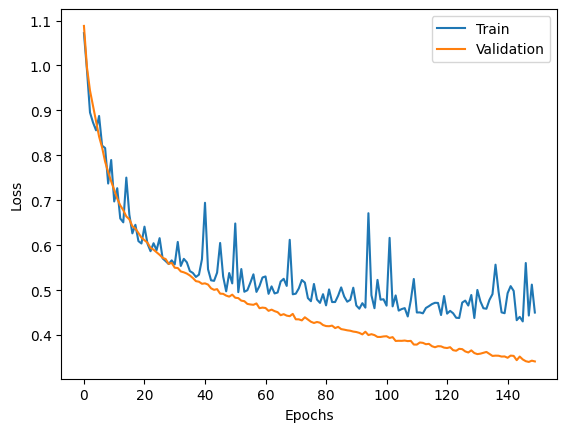

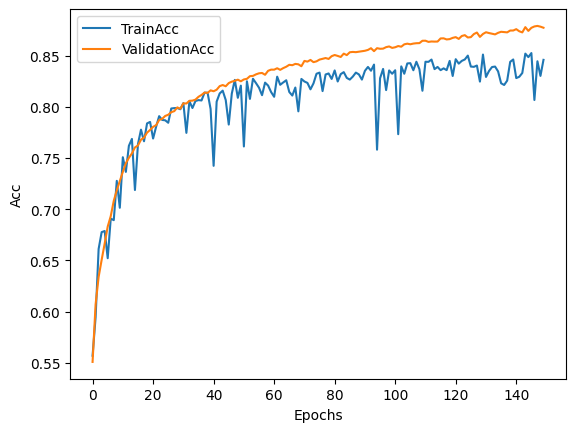

In [54]:
plotValLoss = Resultado.history['val_loss']
plotLoss = Resultado.history['loss']
plt.plot(plotValLoss)
plt.plot(plotLoss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()
plotValLoss = Resultado.history['val_accuracy']
plotLoss = Resultado.history['accuracy']
plt.plot(plotValLoss)
plt.plot(plotLoss)
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['TrainAcc', 'ValidationAcc'])
plt.show()

In [55]:
L2(l2= 0.0001)
Modelo1 = Sequential()
Modelo1.add(Dense(200, input_shape=(784,), activation='relu', kernel_regularizer='l2'))
Modelo1.add(Dropout(0.0))
Modelo1.add(Dense(4,activation='softmax'))
Modelo1.compile(optimizer=keras.SGD(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
Resultado = Modelo1.fit(x=X_train, y=Y_train, epochs=150, validation_data=(X_val, Y_val), verbose=2, batch_size=256)
K.clear_session()


Epoch 1/150
381/381 - 2s - loss: 2.7434 - accuracy: 0.5480 - val_loss: 1.7492 - val_accuracy: 0.6029 - 2s/epoch - 6ms/step
Epoch 2/150
381/381 - 2s - loss: 1.4290 - accuracy: 0.5832 - val_loss: 1.2584 - val_accuracy: 0.5518 - 2s/epoch - 5ms/step
Epoch 3/150
381/381 - 2s - loss: 1.1425 - accuracy: 0.5940 - val_loss: 1.1553 - val_accuracy: 0.5389 - 2s/epoch - 5ms/step
Epoch 4/150
381/381 - 2s - loss: 1.0811 - accuracy: 0.5940 - val_loss: 1.0362 - val_accuracy: 0.6384 - 2s/epoch - 5ms/step
Epoch 5/150
381/381 - 2s - loss: 1.0643 - accuracy: 0.6004 - val_loss: 1.0279 - val_accuracy: 0.6104 - 2s/epoch - 6ms/step
Epoch 6/150
381/381 - 2s - loss: 1.0559 - accuracy: 0.6034 - val_loss: 1.0657 - val_accuracy: 0.5710 - 2s/epoch - 5ms/step
Epoch 7/150
381/381 - 2s - loss: 1.0524 - accuracy: 0.6058 - val_loss: 1.2103 - val_accuracy: 0.4727 - 2s/epoch - 5ms/step
Epoch 8/150
381/381 - 2s - loss: 1.0474 - accuracy: 0.6108 - val_loss: 1.1227 - val_accuracy: 0.5379 - 2s/epoch - 5ms/step
Epoch 9/150
381/

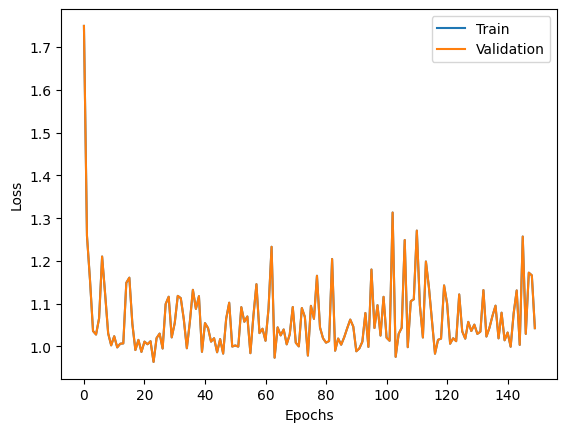

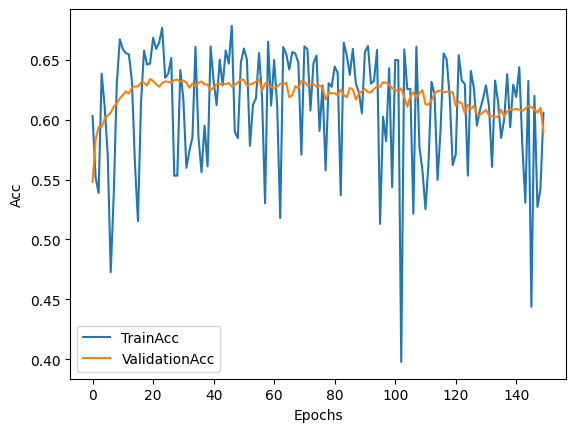

In [56]:
plotValLoss = Resultado.history['val_loss']
plotLoss = Resultado.history['loss']
plt.plot(plotValLoss)
plt.plot(plotValLoss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()
plotValLoss = Resultado.history['val_accuracy']
plotLoss = Resultado.history['accuracy']
plt.plot(plotValLoss)
plt.plot(plotLoss)
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['TrainAcc', 'ValidationAcc'])
plt.show()

In [57]:
Modelo1 = Sequential()
Modelo1.add(Dense(200, input_shape=(784,), activation='relu'))
Modelo1.add(Dropout(0.2))
Modelo1.add(Dense(4,activation='softmax'))
Modelo1.compile(optimizer=keras.SGD(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
Resultado = Modelo1.fit(x=X_train, y=Y_train, epochs=150, validation_data=(X_val, Y_val), verbose=2, batch_size=256)
K.clear_session()


Epoch 1/150
381/381 - 3s - loss: 1.0848 - accuracy: 0.5558 - val_loss: 1.0047 - val_accuracy: 0.6183 - 3s/epoch - 8ms/step
Epoch 2/150
381/381 - 2s - loss: 0.9915 - accuracy: 0.6117 - val_loss: 0.9538 - val_accuracy: 0.6399 - 2s/epoch - 6ms/step
Epoch 3/150
381/381 - 2s - loss: 0.9445 - accuracy: 0.6336 - val_loss: 0.8917 - val_accuracy: 0.6612 - 2s/epoch - 6ms/step
Epoch 4/150
381/381 - 2s - loss: 0.9075 - accuracy: 0.6535 - val_loss: 0.9389 - val_accuracy: 0.6235 - 2s/epoch - 5ms/step
Epoch 5/150
381/381 - 2s - loss: 0.8754 - accuracy: 0.6689 - val_loss: 0.8588 - val_accuracy: 0.6817 - 2s/epoch - 5ms/step
Epoch 6/150
381/381 - 2s - loss: 0.8437 - accuracy: 0.6859 - val_loss: 0.9120 - val_accuracy: 0.6341 - 2s/epoch - 5ms/step
Epoch 7/150
381/381 - 2s - loss: 0.8150 - accuracy: 0.6977 - val_loss: 0.7678 - val_accuracy: 0.7180 - 2s/epoch - 6ms/step
Epoch 8/150
381/381 - 2s - loss: 0.7924 - accuracy: 0.7084 - val_loss: 0.7642 - val_accuracy: 0.7169 - 2s/epoch - 6ms/step
Epoch 9/150
381/

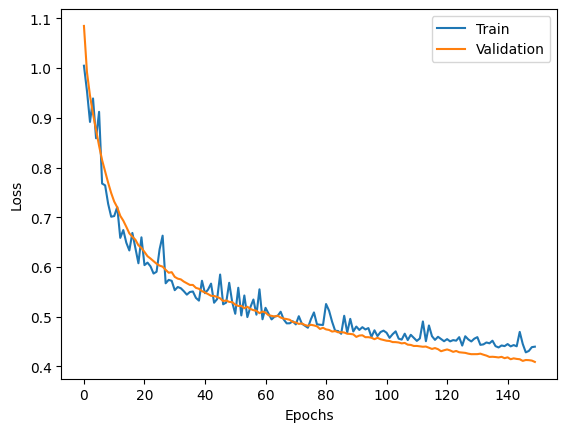

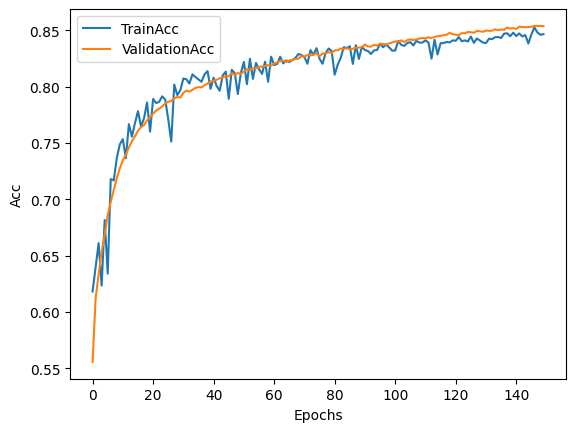

In [58]:
plotValLoss = Resultado.history['val_loss']
plotLoss = Resultado.history['loss']
plt.plot(plotValLoss)
plt.plot(plotLoss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()
plotValLoss = Resultado.history['val_accuracy']
plotLoss = Resultado.history['accuracy']
plt.plot(plotValLoss)
plt.plot(plotLoss)
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['TrainAcc', 'ValidationAcc'])
plt.show()